# Importing required packages.
This section imports the necessary libraries specifically for implementing the **Naive Bayes classifier** and evaluating its performance. 

In [1]:
import joblib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [2]:
# Load preprocessed data
X_train = joblib.load('X_train.pkl')
X_test = joblib.load('X_test.pkl')
y_train = joblib.load('y_train.pkl')
y_test = joblib.load('y_test.pkl')

### How Naive Bayes Work
Naive Bayes is a **probabilistic classifier** based on **Bayes’ Theorem**, with a strong (naive) assumption
that all features are **independent given the class label**.

The prediction is based on computing the **posterior probability** for each class using:

    P(y | X) = (P(X | y) * P(y)) / P(X)

Where:
- `P(y | X)` is the probability of class `y` given the input features `X`
- `P(X | y)` is the likelihood of the features given class `y`
- `P(y)` is the prior probability of class `y`
- `P(X)` is the evidence (can be ignored during classification since it's constant for all classes)

In `GaussianNB` (used in this project), it is assumed that the features follow a **Gaussian (normal) distribution**.
For each feature and class, the model estimates:
- The **mean** and **variance** during training
- Then computes the **probability density** for test points using the Gaussian formula

Despite its simplicity, Naive Bayes performs well on many real-world datasets, especially those with
**independent or semi-independent features**.

In [3]:
# Initialize and train the Naive Bayes classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predict on the test set
y_pred = nb_model.predict(X_test)

In [4]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"Model: {model.__class__.__name__}")
    print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall:    {recall_score(y_test, y_pred):.4f}")
    print(f"F1-score:  {f1_score(y_test, y_pred):.4f}")
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"{model.__class__.__name__} Confusion Matrix")
    plt.show()


Model: GaussianNB
Accuracy:  0.8605
Precision: 0.5000
Recall:    0.7083
F1-score:  0.5862

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       148
           1       0.50      0.71      0.59        24

    accuracy                           0.86       172
   macro avg       0.72      0.80      0.75       172
weighted avg       0.89      0.86      0.87       172


Confusion Matrix:


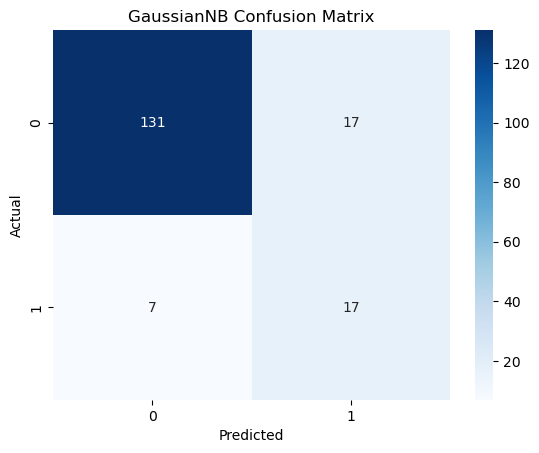

In [5]:
evaluate_model(GaussianNB(), X_train, y_train, X_test, y_test)